In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

In [14]:
def load_cached_lut(pkl_path="../src/FreeSurferColorLUT.pkl", fallback_txt="../src/FreeSurferColorLUT.txt"):
    """Load LUT from cached .pkl, or fallback to .txt and save."""
    if os.path.exists(pkl_path):
        with open(pkl_path, "rb") as f:
            return pickle.load(f)
    else:
        print("[!] Cached LUT not found, loading from .txt...")
        lut = load_freesurfer_lut(fallback_txt)
        with open(pkl_path, "wb") as f:
            pickle.dump(lut, f)
        return lut

def load_freesurfer_lut(lut_path="../src/FreeSurferColorLUT.txt"):
    """Parse FreeSurferColorLUT.txt into {index: region_name}."""
    lut = {}
    with open(lut_path, 'r') as f:
        for line in f:
            if line.strip() == '' or line.startswith('#'):
                continue
            parts = line.split()
            try:
                idx = int(parts[0])
                name = parts[1]
                lut[idx] = name
            except:
                continue
    return lut

def plot_connectome(connectome_path, regions_path=None, title=None, save_path=None):
    conn = np.load(connectome_path)

    region_labels = None
    if regions_path and os.path.exists(regions_path):
        regions = np.load(regions_path).astype(int)
        lut = load_cached_lut()
        region_labels = [lut.get(r, str(r)) for r in regions]

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        conn,
        cmap='coolwarm',
        center=0,
        square=True,
        cbar_kws={"label": "Pearson r"},
        xticklabels=region_labels,
        yticklabels=region_labels
    )
    plt.title(title or os.path.basename(connectome_path).replace("_", " "))
    plt.xlabel("Region")
    plt.ylabel("Region")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"Saved plot to {save_path}")
    else:
        plt.show()

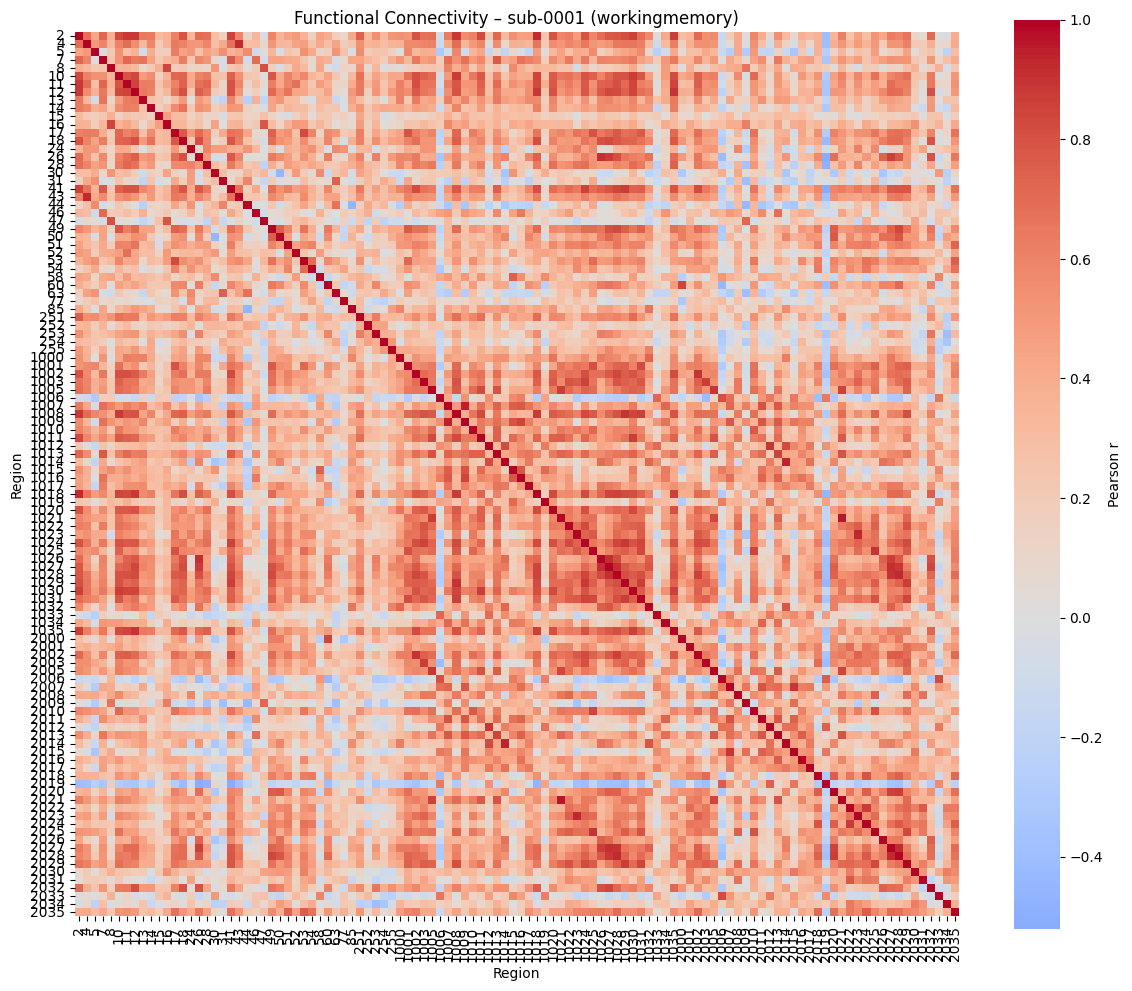

In [15]:
task = "workingmemory"
subject = "sub-0001"
base_path = f"../data/derivatives/connectomes/{task}/{subject}"

conn_path = f"{base_path}_connectome.npy"
regions_path = f"{base_path}_regions.npy"

plot_connectome(
    connectome_path=conn_path,
    regions_path=regions_path,
    title=f"Functional Connectivity – {subject} ({task})"
)